In [1]:
#Import necessary packages 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:
# suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
# load the dataset
df = pd.read_csv('df2.csv', index_col=0)

In [4]:
print(df.shape)

(232, 16)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 10 to 555
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             232 non-null    int64  
 1   Product_type     232 non-null    object 
 2   Ticker           232 non-null    object 
 3   close            232 non-null    float64
 4   close_plus6      232 non-null    float64
 5   market_cap_cur   232 non-null    float64
 6   shares_out       232 non-null    float64
 7   year_inc         232 non-null    float64
 8   spx_close        232 non-null    float64
 9   spx_plus6        232 non-null    float64
 10  Previous_SBs     232 non-null    int64  
 11  Yearly_Ad_Count  232 non-null    int64  
 12  New              232 non-null    int64  
 13  return           232 non-null    float64
 14  SP_return        232 non-null    float64
 15  overperform      232 non-null    int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 30.8+ KB


The null values have been taken care of already.

There are several unnecessary varables `close`, `close_plus6`, `spx_close`, and `spx_plus6`.

Both `return` and `SP_return` contain future information and also should be deleted from the model.


In [6]:
df.drop(axis='columns' , columns=['close', 'close_plus6', 'spx_close', 'spx_plus6', 'return', 'SP_return' ], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 10 to 555
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             232 non-null    int64  
 1   Product_type     232 non-null    object 
 2   Ticker           232 non-null    object 
 3   market_cap_cur   232 non-null    float64
 4   shares_out       232 non-null    float64
 5   year_inc         232 non-null    float64
 6   Previous_SBs     232 non-null    int64  
 7   Yearly_Ad_Count  232 non-null    int64  
 8   New              232 non-null    int64  
 9   overperform      232 non-null    int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 19.9+ KB


In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [8]:
# Split the data
X = df.drop('overperform',axis=1)
y = df['overperform']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=714)


In [9]:
# pick transformers
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

In [10]:
# split columns into numeric and categorical
numeric_features = ['Year', 'market_cap_cur', 'shares_out', 'year_inc', 'Previous_SBs', 'Yearly_Ad_Count','New']
categorical_features = ['Product_type', 'Ticker']
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)
   ,('categorical', categorical_transformer, categorical_features)
]) 

In [11]:
# define the pipeline
pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',LogisticRegression())
           ])

In [12]:
lr_model = pipeline.fit(X_train, y_train)
print (lr_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'market_cap_cur',
                                                   'shares_out', 'year_inc',
                                                   'Previous_SBs',
                                                   'Yearly_Ad_Count', 'New']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Product_type',
                          

In [13]:
from sklearn.metrics import r2_score
predictions = lr_model.predict(X_test)
print (r2_score(y_test, predictions))

-0.6537037037037039


In [14]:
print (metrics.recall_score(y_test, predictions) )

0.25


In [15]:
from nltk import ConfusionMatrix 
print (ConfusionMatrix(list(y_test), list(predictions)))

  |  0  1 |
--+-------+
0 |<23> 4 |
1 | 15 <5>|
--+-------+
(row = reference; col = test)



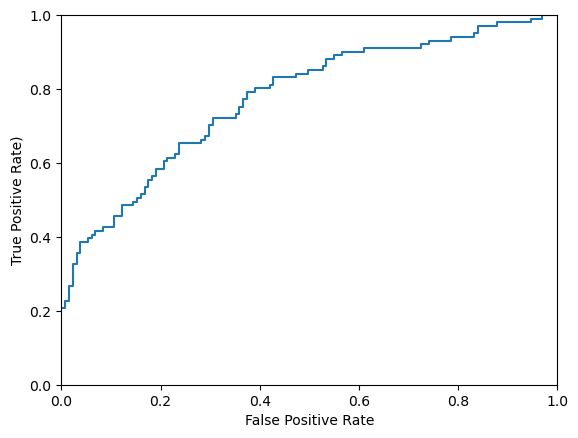

In [16]:
#ROC CURVES and AUC 
# plot ROC curve 
probs = pipeline.predict_proba(X)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y, probs) 
plt.plot(fpr, tpr) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate)') 
plt.show()

In [17]:
# calculate AUC 
print (metrics.roc_auc_score(y, probs))


0.7743934698813393
